In [164]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [165]:
df=pd.read_csv('regLinPoli.csv')
df.head()


,X,X2,X3,X4,X5,y
0,7.317938,53.552216,0.864389,0.859736,114,50.552216
1,1.284357,1.649574,0.108686,0.959256,115,2.649574
2,97.740652,9553.235089,1.990075,-0.344100,116,9643.235089
3,17.753591,315.190006,1.249286,-0.889370,117,310.190006
4,66.441081,4414.417290,1.822437,-0.450777,118,4390.417290


In [336]:
X=np.array(df.iloc[:,0:5]) 
y=np.array(df.iloc[:,5])

In [355]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.95,random_state=101)

**estandarizacion**

In [356]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

m=np.mean(y_train)
sd=np.std(y_train)
y_train=(y_train-m)/sd
y_test=(y_test-m)/sd

**funcion de estimación**

In [357]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

**regularización por renglón**    

In [358]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*X_train[i,j] - lam*w[j+1]
        
    return w

**Error con $\lambda=0$ y $\eta=0.05$**

In [403]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.021645066501152558

**Error con $\lambda=0.01$ y $\eta=0.05$**

In [404]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0.01,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.0732881077427395

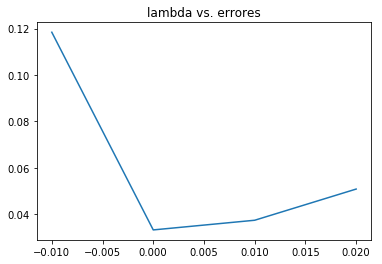

In [406]:
import random as rnd
lam = np.arange(-0.01,0.03,0.01)
error_lambda = []

for l in range(lam.size):
    w= [rnd.random() for i in range(X_train.shape[1]+1)]

    w =regularizado(w,X_train,y_train,lam[l],0.05)
    error_lambda = error_lambda + [np.mean((y_test - (w[0]+ np.dot(X_test,w[1:len(w)])))**2)]
    
plt.plot(lam,error_lambda)
plt.title('lambda vs. errores')

# MINIBATCH

**Calculamos las w's por bloques de datos y no por renglones**

In [407]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

**Regularización para 1 bloque de datos(Pudieran ser todos)**

In [408]:
def wreg(w,x,y,eta,lamb):
    #w=np.ones(len(np.transpose(x))+1)
    error=np.array([]) 
    w0=np.array([]) 
    w1=np.array([])
    while (np.sum((y - np.dot(w,agregar_unos(x).T))))**2 > 0.01:
        error=np.append(error,(np.sum((y - np.dot(w,agregar_unos(x).T))))**2) 
        w0=np.append(w0,w[0]) 
        w1=np.append(w1,w[1])
        #print(w[0],w[1])
        res=y-np.dot(w,agregar_unos(x).T) 
        w[0]= w[0] + (eta * np.sum(res)/len(y)) 
        for i in (range(len(x.T))):
            w[i+1]=w[i+1]+eta*np.sum(res*agregar_unos(x)[:,i+1])/len(y)-lamb*w[i+1]
        error2=np.mean((np.dot(w,agregar_unos(x).T) - y_train)**2)
    return w,error2

#w,error2=wreg(X_train,y_train,0.05,0) 

**Para $\lambda=0$**

In [416]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2)

[0.0019525560643993457, 0.28657684330307481, 0.59352936003882928, 0.11188614748424267, 0.024347631946547561, 0.037193819956426295] 0.0236125150989


0.029850280573390342

**Para $\lambda=0.01$**

In [417]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0.01) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2)

[0.0019437790462334518, 0.37285788366172556, 0.48390161904912254, 0.060098397394792412, 0.012498848228228172, 0.029985076460840351] 0.0317670291215


0.044527035952713075